<a href="https://colab.research.google.com/github/edwin-19/NLP-Framework-Comparison/blob/main/Nemo_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get update && apt-get install -y libsndfile1 ffmpeg
!pip install Cython
!pip install nemo_toolkit[all]

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/restricted amd64 Packages [954 kB]
Get:13 h

In [2]:
import nemo
import nemo.collections.asr as nemo_asr
import nemo.collections.nlp as nemo_nlp
import nemo.collections.tts as nemo_tts

[NeMo W 2022-05-11 06:25:06 optimizers:55] Apex was not found. Using the lamb or fused_adam optimizer will error out.
################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################

[NeMo W 2022-05-11 06:25:08 experimental:28] Module <class 'nemo.collections.nlp.data.language_modeling.megatron.megatron_batch_samplers.MegatronPretrainingRandomBatchSampler'> is experimental, not ready for production and is not fully supported. Use at your own risk.


In [15]:
import wget
from IPython.display import Audio
from matplotlib import pyplot as plt

In [3]:
# Next, we instantiate all the necessary models directly from NVIDIA NGC
# Speech Recognition model - QuartzNet trained on Russian part of MCV 6.0
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_ru_quartznet15x5").cuda()
nmt_model = nemo_nlp.models.MTEncDecModel.from_pretrained(model_name='nmt_ru_en_transformer6x6').cuda()
spectrogram_generator = nemo_tts.models.FastPitchModel.from_pretrained(model_name="tts_en_fastpitch").cuda()
# Vocoder model which takes spectrogram and produces actual audio
vocoder = nemo_tts.models.HifiGanModel.from_pretrained(model_name="tts_hifigan").cuda()

[NeMo I 2022-05-11 06:26:42 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/stt_ru_quartznet15x5/versions/1.0.0rc1/files/stt_ru_quartznet15x5.nemo to /root/.cache/torch/NeMo/NeMo_1.8.2/stt_ru_quartznet15x5/92506570b7206ea395e295b3fbbf07e3/stt_ru_quartznet15x5.nemo
[NeMo I 2022-05-11 06:26:46 common:747] Instantiating model from pre-trained checkpoint


[NeMo W 2022-05-11 06:26:47 modelPT:149] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /raid/noneval.json
    sample_rate: 16000
    labels:
    - ' '
    - а
    - б
    - в
    - г
    - д
    - е
    - ё
    - ж
    - з
    - и
    - й
    - к
    - л
    - м
    - н
    - о
    - п
    - р
    - с
    - т
    - у
    - ф
    - х
    - ц
    - ч
    - ш
    - щ
    - ъ
    - ы
    - ь
    - э
    - ю
    - я
    batch_size: 16
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: null
    num_workers: 8
    pin_memory: true
    
[NeMo W 2022-05-11 06:26:47 modelPT:156] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation da

[NeMo I 2022-05-11 06:26:47 features:259] PADDING: 16
[NeMo I 2022-05-11 06:26:47 features:276] STFT using torch
[NeMo I 2022-05-11 06:27:01 save_restore_connector:209] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.8.2/stt_ru_quartznet15x5/92506570b7206ea395e295b3fbbf07e3/stt_ru_quartznet15x5.nemo.
[NeMo I 2022-05-11 06:27:01 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/nmt_ru_en_transformer6x6/versions/1.0.0rc1/files/nmt_ru_en_transformer6x6.nemo to /root/.cache/torch/NeMo/NeMo_1.8.2/nmt_ru_en_transformer6x6/3db82426b17db1ae7cc7ae4ee3e3679b/nmt_ru_en_transformer6x6.nemo
[NeMo I 2022-05-11 06:27:29 common:747] Instantiating model from pre-trained checkpoint
[NeMo I 2022-05-11 06:27:37 tokenizer_utils:178] Getting YouTokenToMeTokenizer with model: /tmp/tmp9_lh9to5/tokenizer.all.32000.BPE.model with r2l: False.
[NeMo I 2022-05-11 06:27:37 tokenizer_utils:178] Getting YouTokenToMeTokenizer with model: /tmp/tmp9_lh9to5/to

[NeMo W 2022-05-11 06:27:37 modelPT:149] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    src_file_name: /home/sandeepsub/Datasets/wmt/wmt20_en_zh/processed/batches.tokens.cmwt.septokenizer.16000.pkl
    tgt_file_name: /home/sandeepsub/Datasets/wmt/wmt20_en_zh/processed/batches.tokens.cmwt.septokenizer.16000.pkl
    tokens_in_batch: 16000
    clean: true
    max_seq_length: 512
    cache_ids: false
    cache_data_per_node: false
    use_cache: false
    shuffle: true
    num_samples: -1
    drop_last: false
    pin_memory: false
    num_workers: 8
    load_from_cached_dataset: true
    reverse_lang_direction: true
    
[NeMo W 2022-05-11 06:27:37 modelPT:156] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the valid

[NeMo I 2022-05-11 06:27:42 save_restore_connector:209] Model MTEncDecModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.8.2/nmt_ru_en_transformer6x6/3db82426b17db1ae7cc7ae4ee3e3679b/nmt_ru_en_transformer6x6.nemo.
[NeMo I 2022-05-11 06:27:42 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_en_fastpitch/versions/1.8.1/files/tts_en_fastpitch_align.nemo to /root/.cache/torch/NeMo/NeMo_1.8.2/tts_en_fastpitch_align/26d7e09971f1d611e24df90c7a9d9b38/tts_en_fastpitch_align.nemo
[NeMo I 2022-05-11 06:27:50 common:747] Instantiating model from pre-trained checkpoint
[NeMo I 2022-05-11 06:27:51 tokenize_and_classify:88] Creating ClassifyFst grammars.


[NeMo W 2022-05-11 06:27:56 g2ps:85] apply_to_oov_word=None, it means that some of words will remain unchanged if they are not handled by one of rule in self.parse_one_word(). It is useful when you use tokenizer with set of phonemes and chars together, otherwise it can be not.
[NeMo W 2022-05-11 06:27:56 modelPT:149] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.torch.data.TTSDataset
      manifest_filepath: /ws/LJSpeech/nvidia_ljspeech_train_clean_ngc.json
      sample_rate: 22050
      sup_data_path: /raid/LJSpeech/supplementary
      sup_data_types:
      - align_prior_matrix
      - pitch
      n_fft: 1024
      win_length: 1024
      hop_length: 256
      window: hann
      n_mels: 80
      lowfreq: 0
      highfreq: 8000
      max_duration: null
      min_duration: 0.1
      ignore_file: nu

[NeMo I 2022-05-11 06:27:56 features:259] PADDING: 1
[NeMo I 2022-05-11 06:27:56 features:276] STFT using torch
[NeMo I 2022-05-11 06:27:57 save_restore_connector:209] Model FastPitchModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.8.2/tts_en_fastpitch_align/26d7e09971f1d611e24df90c7a9d9b38/tts_en_fastpitch_align.nemo.
[NeMo I 2022-05-11 06:27:57 cloud:66] Downloading from: https://api.ngc.nvidia.com/v2/models/nvidia/nemo/tts_hifigan/versions/1.0.0rc1/files/tts_hifigan.nemo to /root/.cache/torch/NeMo/NeMo_1.8.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo
[NeMo I 2022-05-11 06:28:09 common:747] Instantiating model from pre-trained checkpoint


[NeMo W 2022-05-11 06:28:12 modelPT:149] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/train_finetune.txt
      min_duration: 0.75
      n_segments: 8192
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2022-05-11 06:28:12 modelPT:156] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.MelAudioDataset
      manifest_filepath: /home/fkreuk/data/val_finetune.txt
      min_duration: 3
      n_segments: 66150


[NeMo I 2022-05-11 06:28:12 features:259] PADDING: 0
[NeMo I 2022-05-11 06:28:12 features:276] STFT using torch


[NeMo W 2022-05-11 06:28:12 features:234] Using torch_stft is deprecated and has been removed. The values have been forcibly set to False for FilterbankFeatures and AudioToMelSpectrogramPreprocessor. Please set exact_pad to True as needed.


[NeMo I 2022-05-11 06:28:12 features:259] PADDING: 0
[NeMo I 2022-05-11 06:28:12 features:276] STFT using torch
[NeMo I 2022-05-11 06:28:13 save_restore_connector:209] Model HifiGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.8.2/tts_hifigan/e6da322f0f7e7dcf3f1900a9229a7e69/tts_hifigan.nemo.


In [6]:
# Transcribe an audio file
# IMPORTANT: The audio must be mono with 16Khz sampling rate
# Get example from: https://nemo-public.s3.us-east-2.amazonaws.com/mcv-samples-ru/common_voice_ru_19034087.wav
wget.download('https://nemo-public.s3.us-east-2.amazonaws.com/mcv-samples-ru/common_voice_ru_19034087.wav', out='sound_ru.wav')

'sound_ru.wav'

In [9]:
# Display sound file
Audio('sound_ru.wav')

In [11]:
russion_text = quartznet.transcribe(['sound_ru.wav'])
# You should see russian text here. Let's translate it to English
english_text = nmt_model.translate(russion_text)

Transcribing:   0%|          | 0/1 [00:00<?, ?it/s]

[NeMo W 2022-05-11 06:34:06 nemo_logging:349] /usr/local/lib/python3.7/dist-packages/nemo/collections/nlp/modules/common/transformer/transformer_generators.py:363: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
      mems_ids = indices_i.unsqueeze(2).unsqueeze(3).repeat(1, 1, p_len - 1, hidden_size) // self.beam_size
    


In [25]:
parased = spectrogram_generator.parse(english_text[0])
spectogram = spectrogram_generator.generate_spectrogram(tokens=parased)
audio = vocoder.convert_spectrogram_to_audio(spec=spectogram)
true_audio = audio.detach().cpu().numpy().squeeze(0)

[NeMo W 2022-05-11 06:40:23 fastpitch:201] parse() is meant to be called in eval mode.
[NeMo W 2022-05-11 06:40:23 fastpitch:264] generate_spectrogram() is meant to be called in eval mode.


(<matplotlib.image.AxesImage at 0x7fdafe951c90>,
 tensor([[ 0, 41,  0, 16, 31,  8, 44, 16, 18,  0, 89, 77, 70, 89,  0, 89, 77, 78,
          88,  0, 85, 70, 87, 70, 76, 87, 70, 85, 77,  0, 71, 74,  0, 10, 44,  5,
          18,  0, 75, 84, 87,  0, 89, 77, 74,  0, 18, 41, 11,  0,  1, 56, 52, 13,
           0, 31, 12, 18, 53, 10,  0, 78, 89,  0, 78, 88,  0,  9, 10, 44, 15, 31,
           5, 42,  3,  0, 98,  0]], device='cuda:0'))

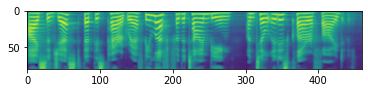

In [19]:
plt.imshow(spectogram.detach().cpu().numpy()[0])

In [28]:
import soundfile as sf
sf.write("speech.wav", audio.to('cpu').detach().numpy()[0], 22050)

In [29]:
Audio('speech.wav')

In [30]:
!nvidia-smi

Wed May 11 06:43:10 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    28W /  70W |   6952MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------